# Diabetes Predictor
**Write background on the purpose and mission of this file**: 
(Data found from https://www.kaggle.com/code/farzadnekouei/heart-disease-prediction)

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, ConfusionMatrixDisplay, precision_score
label_encoder = preprocessing.LabelEncoder() 

/var/folders/s5/1g0mg8_55rd1syjdkz3c2_gh0000gn/T/ipykernel_98677/3246052347.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read CSV File

In [2]:
df = pd.read_csv('heart.csv')
print(df)
cross_table = df.drop(columns=['target'])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

## Chi-Squared Test

In [3]:
chi_results = {}


for column in cross_table.columns:
    contingency_table = pd.crosstab(cross_table[column], df['target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_results[column] = {'Chi-Squared': chi2, 'p-value': p, 'Degrees of Freedom': dof}


# Print the results
for column, result in chi_results.items():
    print(f"Chi-Squared Test for {column}:")
    print(f"Chi-Squared Value: {result['Chi-Squared']}")
    print(f"P-value: {result['p-value']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print("")

Chi-Squared Test for age:
Chi-Squared Value: 50.12921465201301
P-value: 0.1309121880076365
Degrees of Freedom: 40

Chi-Squared Test for sex:
Chi-Squared Value: 22.717227046576355
P-value: 1.8767776216941503e-06
Degrees of Freedom: 1

Chi-Squared Test for cp:
Chi-Squared Value: 81.68642755194445
P-value: 1.3343043373050064e-17
Degrees of Freedom: 3

Chi-Squared Test for trestbps:
Chi-Squared Value: 47.70581770079516
P-value: 0.4848213101540371
Degrees of Freedom: 48

Chi-Squared Test for chol:
Chi-Squared Value: 173.1018906455863
P-value: 0.1051922998200906
Degrees of Freedom: 151

Chi-Squared Test for fbs:
Chi-Squared Value: 0.10627276301947715
P-value: 0.7444281114149577
Degrees of Freedom: 1

Chi-Squared Test for restecg:
Chi-Squared Value: 10.023091785081
P-value: 0.006660598773498031
Degrees of Freedom: 2

Chi-Squared Test for thalach:
Chi-Squared Value: 110.13495283153387
P-value: 0.07347837419093241
Degrees of Freedom: 90

Chi-Squared Test for exang:
Chi-Squared Value: 55.9445499

## Correlation Matrix

In [4]:
print(df.dtypes)
#converts categorical data like 'oldpeak'
df['oldpeak'] = label_encoder.fit_transform(df['oldpeak'])
#displays first 5 rows
df.head()

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,22,0,0,1,1
1,37,1,2,130,250,0,1,187,0,32,0,0,2,1
2,41,0,1,130,204,0,0,172,0,14,2,0,2,1
3,56,1,1,120,236,0,1,178,0,8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,6,2,0,2,1


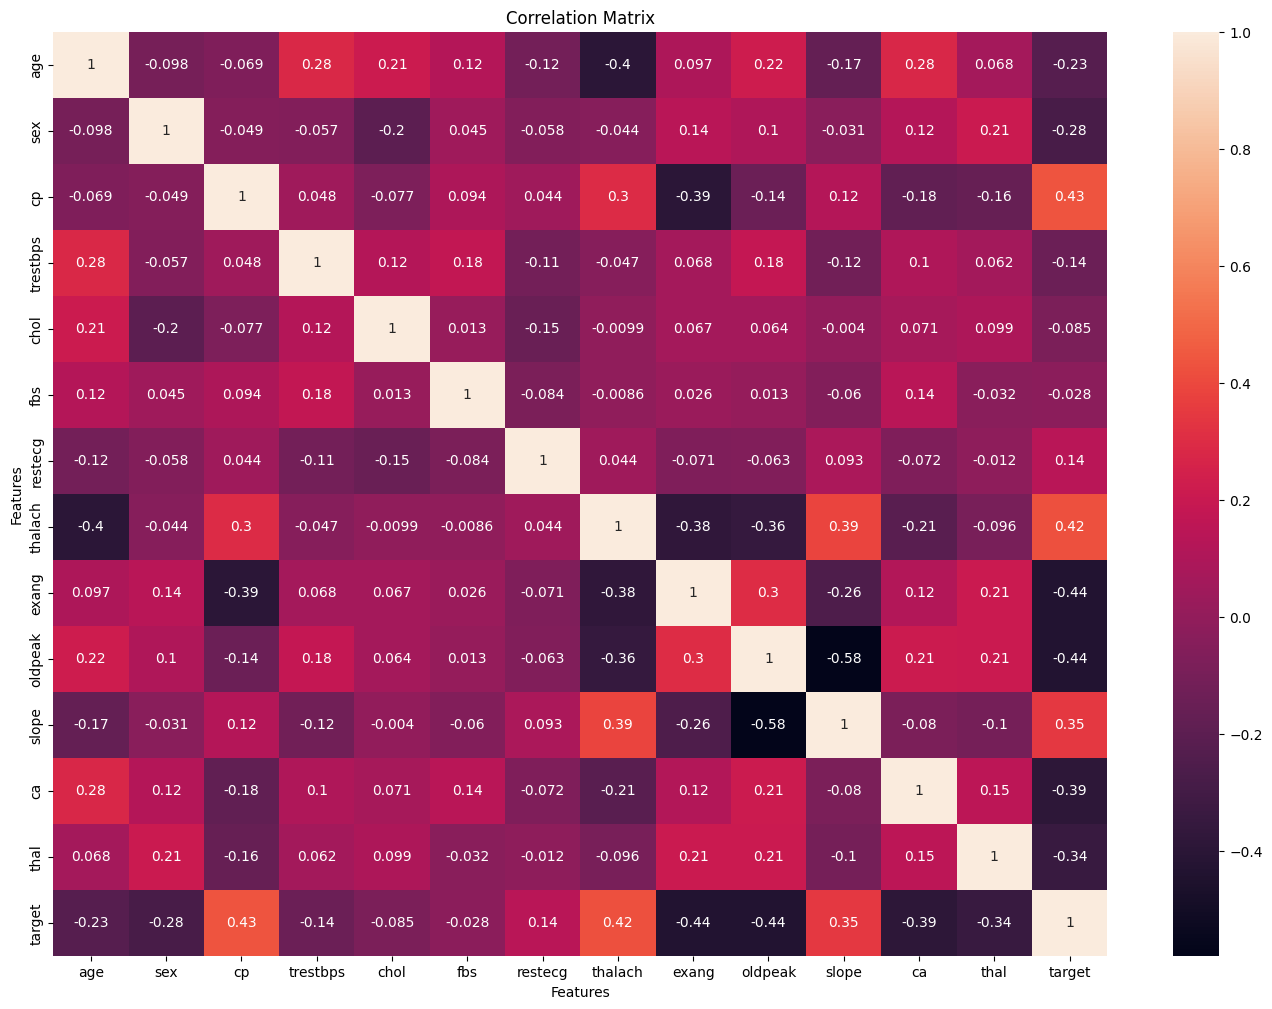

In [5]:
plt.figure(figsize=(17, 12))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

## KNN using cross validation (GridSearchCV)

In [6]:
# Load your dataset
df = pd.read_csv('heart.csv')

# Separate/isolate features from target 
# axis=1 specifies dropping a column with label 'target', for row axis=0
X = df.drop('target', axis=1)
y = df['target']

# Transform the features to fit using StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into 70% training and 30% testing
# Random state 42 ensures reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Use the training data stored in X_train and y_train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions based on the target/test set
#Then print the accuracy/report
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.8791208791208791
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.88      0.90      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



## KNN using for loop (Visualization)

In [7]:
df = pd.read_csv('heart.csv')

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Instead of using cross examination, iterate through each neighbor and fit it in knn and look at it visually.
predictions = {}
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    predictions[i] = accuracy

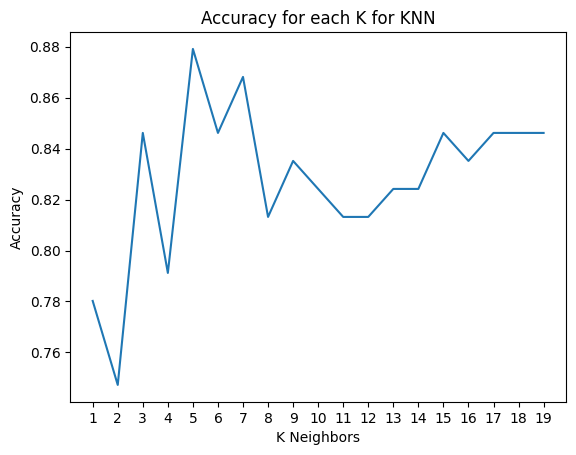

In [8]:
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.xticks(range(min(predictions.keys()), max(predictions.keys()) + 1))
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy for each K for KNN")
plt.show()

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
